In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

def load_video(video_path):
    """
    Load a video file using OpenCV and return the video capture object.
    """
    # Create a VideoCapture object
    cap = cv2.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return None
    
    # Get video properties
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    print(f"Video loaded successfully!")
    print(f"Resolution: {width}x{height}")
    print(f"FPS: {fps}")
    print(f"Total frames: {frame_count}")
    print(f"Duration: {frame_count/fps:.2f} seconds")
    
    return cap

cap = load_video("/Users/ajinkya/Documents/6th_Sem/CV/CP/Violence-Detection/Our_Dataset/Real Life Violence Dataset/Violence/V_1.mp4")

Video loaded successfully!
Resolution: 1920x1080
FPS: 15.416153255350068
Total frames: 103
Duration: 6.68 seconds


Video has 103 total frames
Sampling every 6 frames to extract 16 key frames


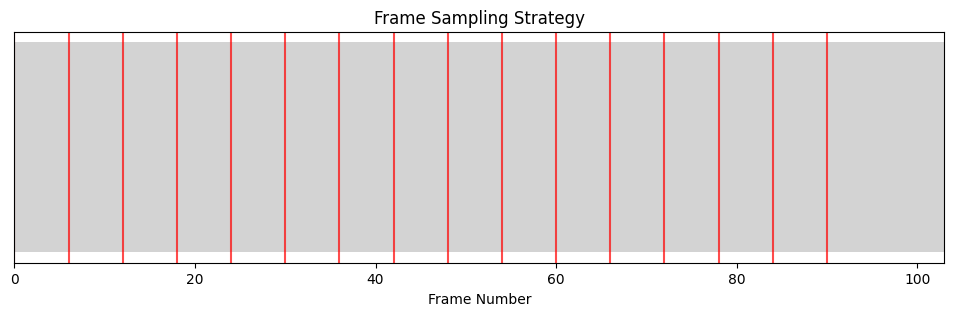

Extracted frame at position 0 (1/16)
Extracted frame at position 6 (2/16)
Extracted frame at position 12 (3/16)
Extracted frame at position 18 (4/16)
Extracted frame at position 24 (5/16)
Extracted frame at position 30 (6/16)
Extracted frame at position 36 (7/16)
Extracted frame at position 42 (8/16)
Extracted frame at position 48 (9/16)
Extracted frame at position 54 (10/16)
Extracted frame at position 60 (11/16)
Extracted frame at position 66 (12/16)
Extracted frame at position 72 (13/16)
Extracted frame at position 78 (14/16)
Extracted frame at position 84 (15/16)
Extracted frame at position 90 (16/16)


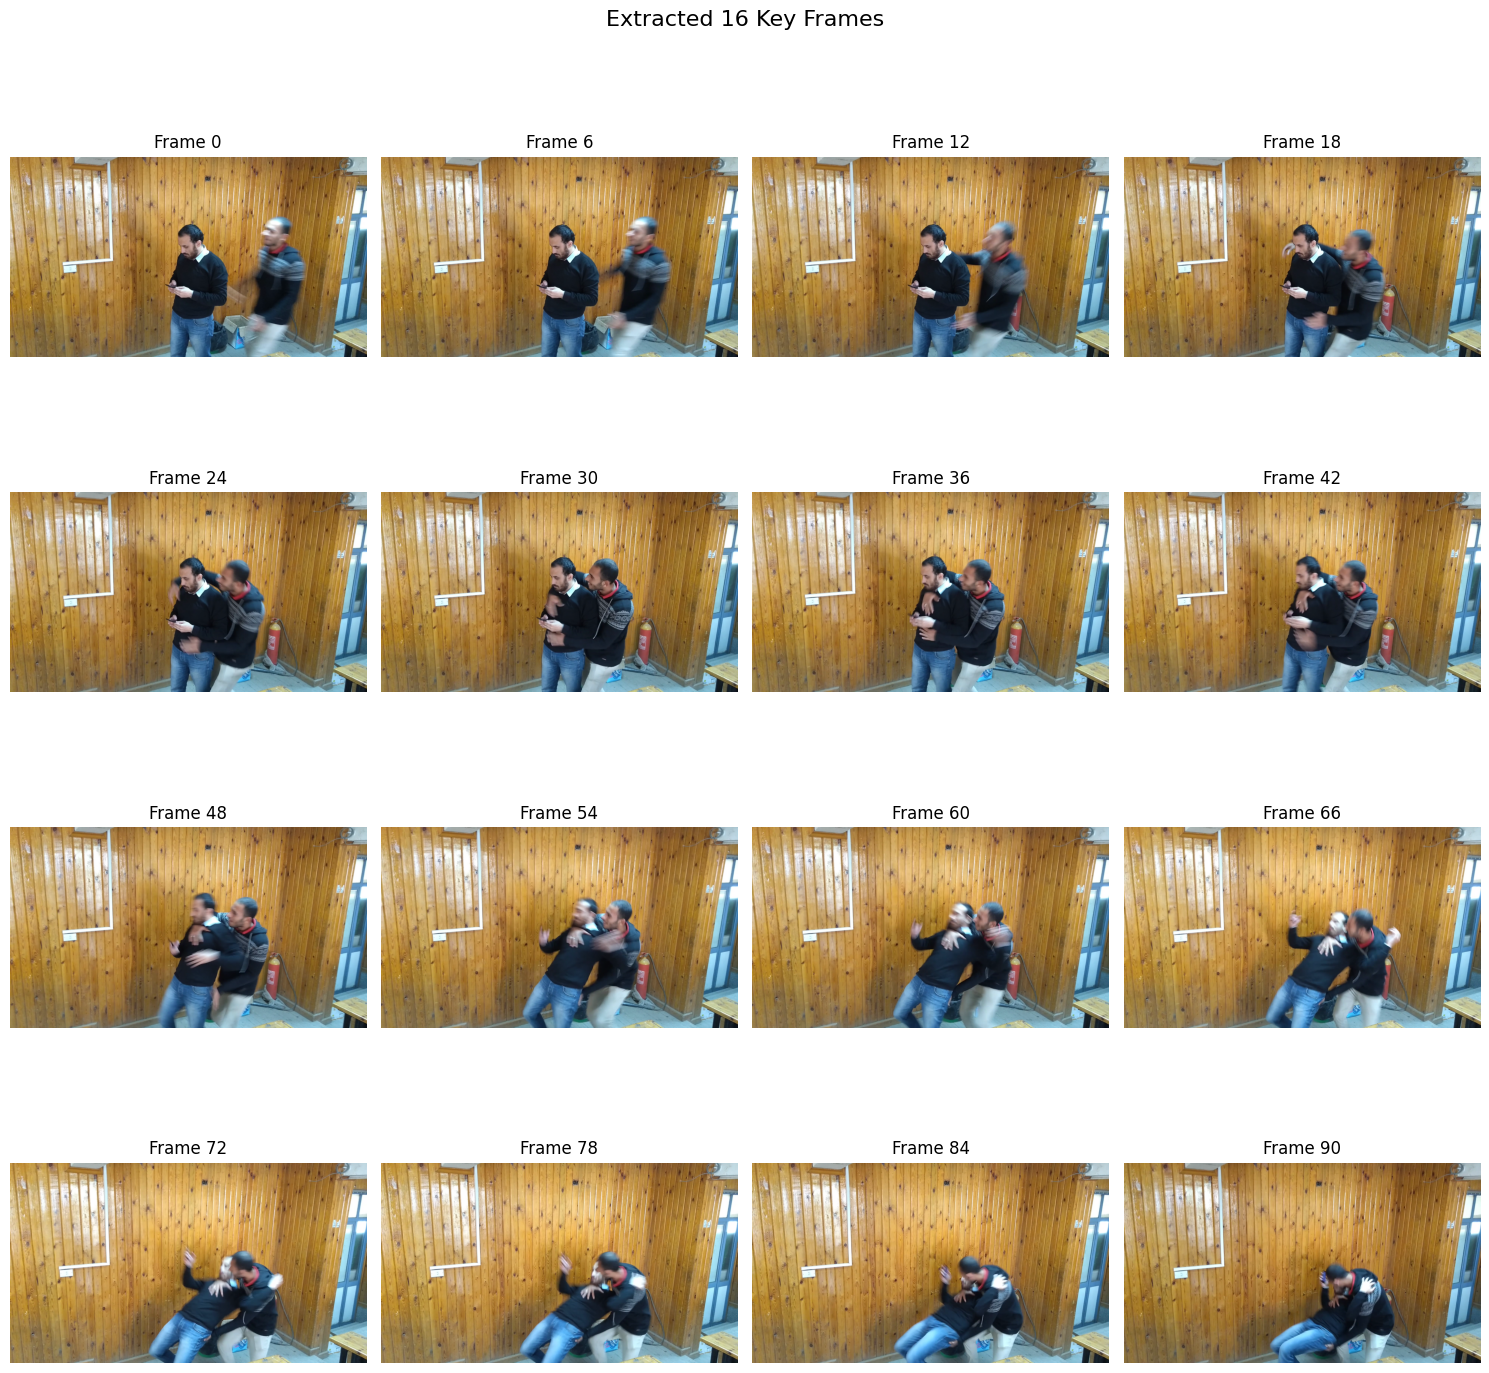

In [ ]:
def extract_and_display_frames(cap, num_frames_to_show=16, delay=0.5):
    """
    Extract frames from the video and display them in a grid layout.
    Simulates the actual implementation's approach of sampling frames
    across the video duration.
    
    Parameters:
    - cap: OpenCV VideoCapture object
    - num_frames_to_show: Number of frames to display (default: 16)
    - delay: Delay before showing the grid in seconds (default: 0.5)
    """
    if cap is None:
        return None
    
    # Get total frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Calculate step to display evenly distributed frames (like your actual implementation)
    skip_frames_window = max(1, total_frames // num_frames_to_show)
    
    print(f"Video has {total_frames} total frames")
    print(f"Sampling every {skip_frames_window} frames to extract {num_frames_to_show} key frames")
    
    # First show a visualization of which frames are being sampled
    plt.figure(figsize=(12, 3))
    plt.barh(0, total_frames, color='lightgray')
    plt.xlim(0, total_frames)
    plt.yticks([])
    
    # Mark the sampled frames
    sampled_points = [skip_frames_window * i for i in range(num_frames_to_show) if skip_frames_window * i < total_frames]
    for point in sampled_points:
        plt.axvline(x=point, color='red', linestyle='-', alpha=0.7)
    
    plt.title("Frame Sampling Strategy")
    plt.xlabel("Frame Number")
    display(plt.gcf())
    plt.close()
    
    time.sleep(delay)
    
    # Reset video to beginning
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    
    frames = []
    frame_indices = []
    
    # Extract the selected frames
    for i in range(num_frames_to_show):
        # Set position to the next sampled frame
        frame_position = min(skip_frames_window * i, total_frames - 1)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_position)
        
        ret, frame = cap.read()
        if not ret:
            print(f"Warning: Could not read frame at position {frame_position}")
            break
            
        # Convert BGR to RGB (matplotlib uses RGB)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(rgb_frame)
        frame_indices.append(frame_position)
        
        print(f"Extracted frame at position {frame_position} ({i+1}/{num_frames_to_show})")
    
    # Create a grid of all extracted frames
    rows = int(np.ceil(np.sqrt(len(frames))))
    cols = int(np.ceil(len(frames) / rows))
    
    plt.figure(figsize=(15, 15))
    
    for i, (frame, frame_idx) in enumerate(zip(frames, frame_indices)):
        plt.subplot(rows, cols, i+1)
        plt.imshow(frame)
        plt.title(f"Frame {frame_idx}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle(f"Extracted {len(frames)} Key Frames", fontsize=16)
    plt.subplots_adjust(top=0.95)
    display(plt.gcf())
    plt.close()
    
    return frames
frames = extract_and_display_frames(cap, num_frames_to_show=16, delay=0.5)

Loading MobileNetV2 model...


Model loaded successfully!
Extracting features from frame 1/16...
Extracting features from frame 2/16...
Extracting features from frame 3/16...
Extracting features from frame 4/16...
Extracting features from frame 5/16...
Extracting features from frame 6/16...
Extracting features from frame 7/16...
Extracting features from frame 8/16...
Extracting features from frame 9/16...
Extracting features from frame 10/16...
Extracting features from frame 11/16...
Extracting features from frame 12/16...
Extracting features from frame 13/16...
Extracting features from frame 14/16...
Extracting features from frame 15/16...
Extracting features from frame 16/16...


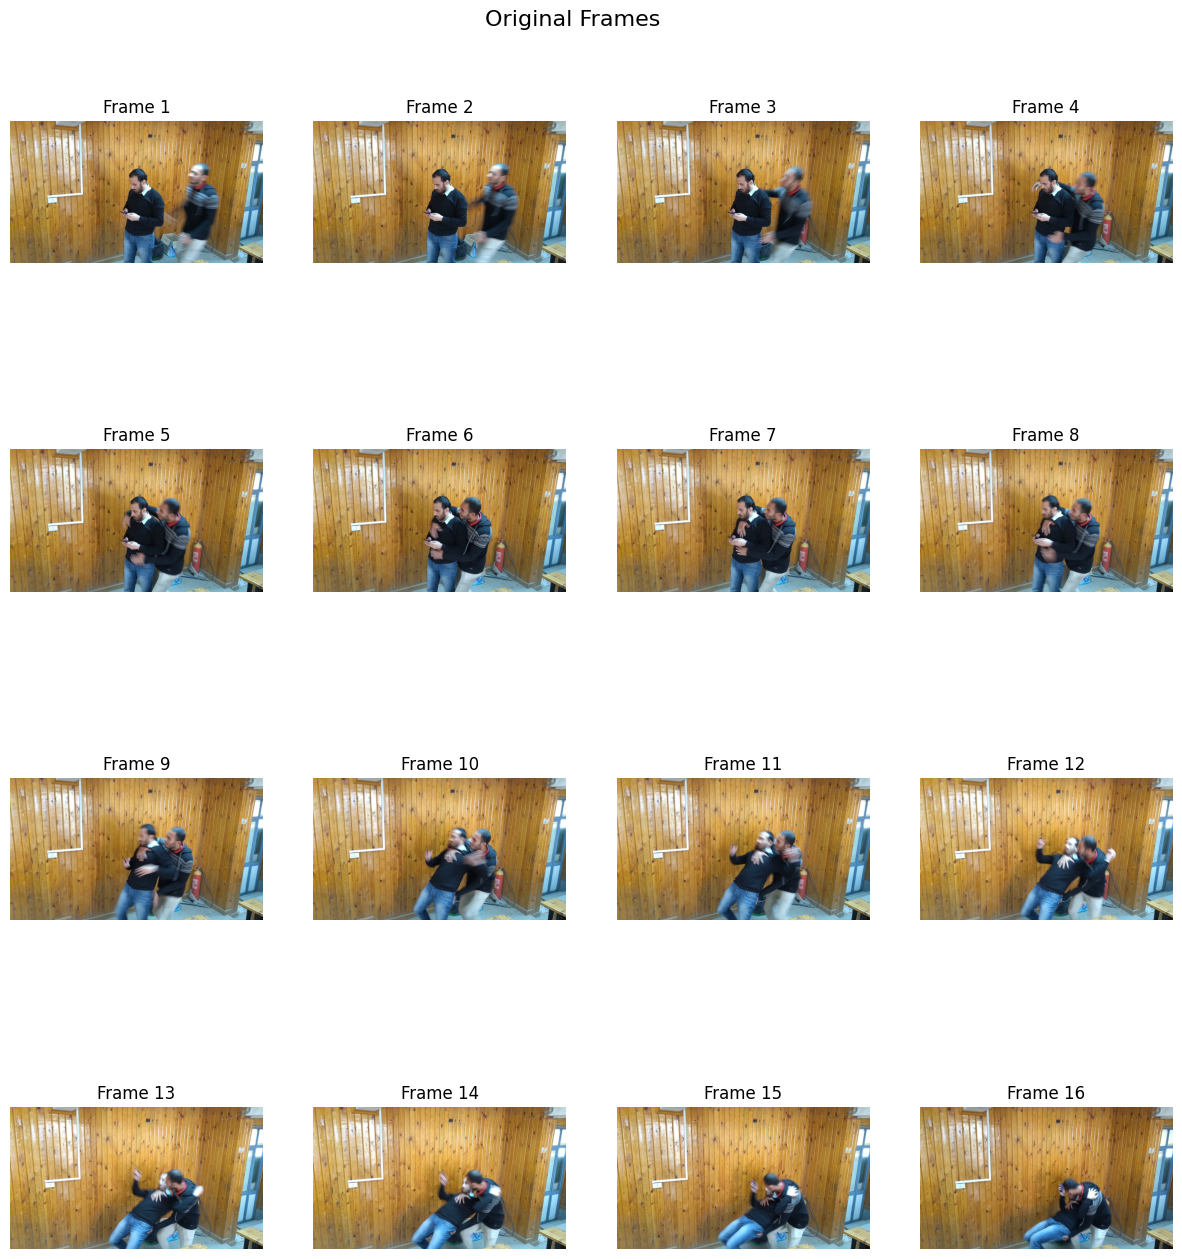

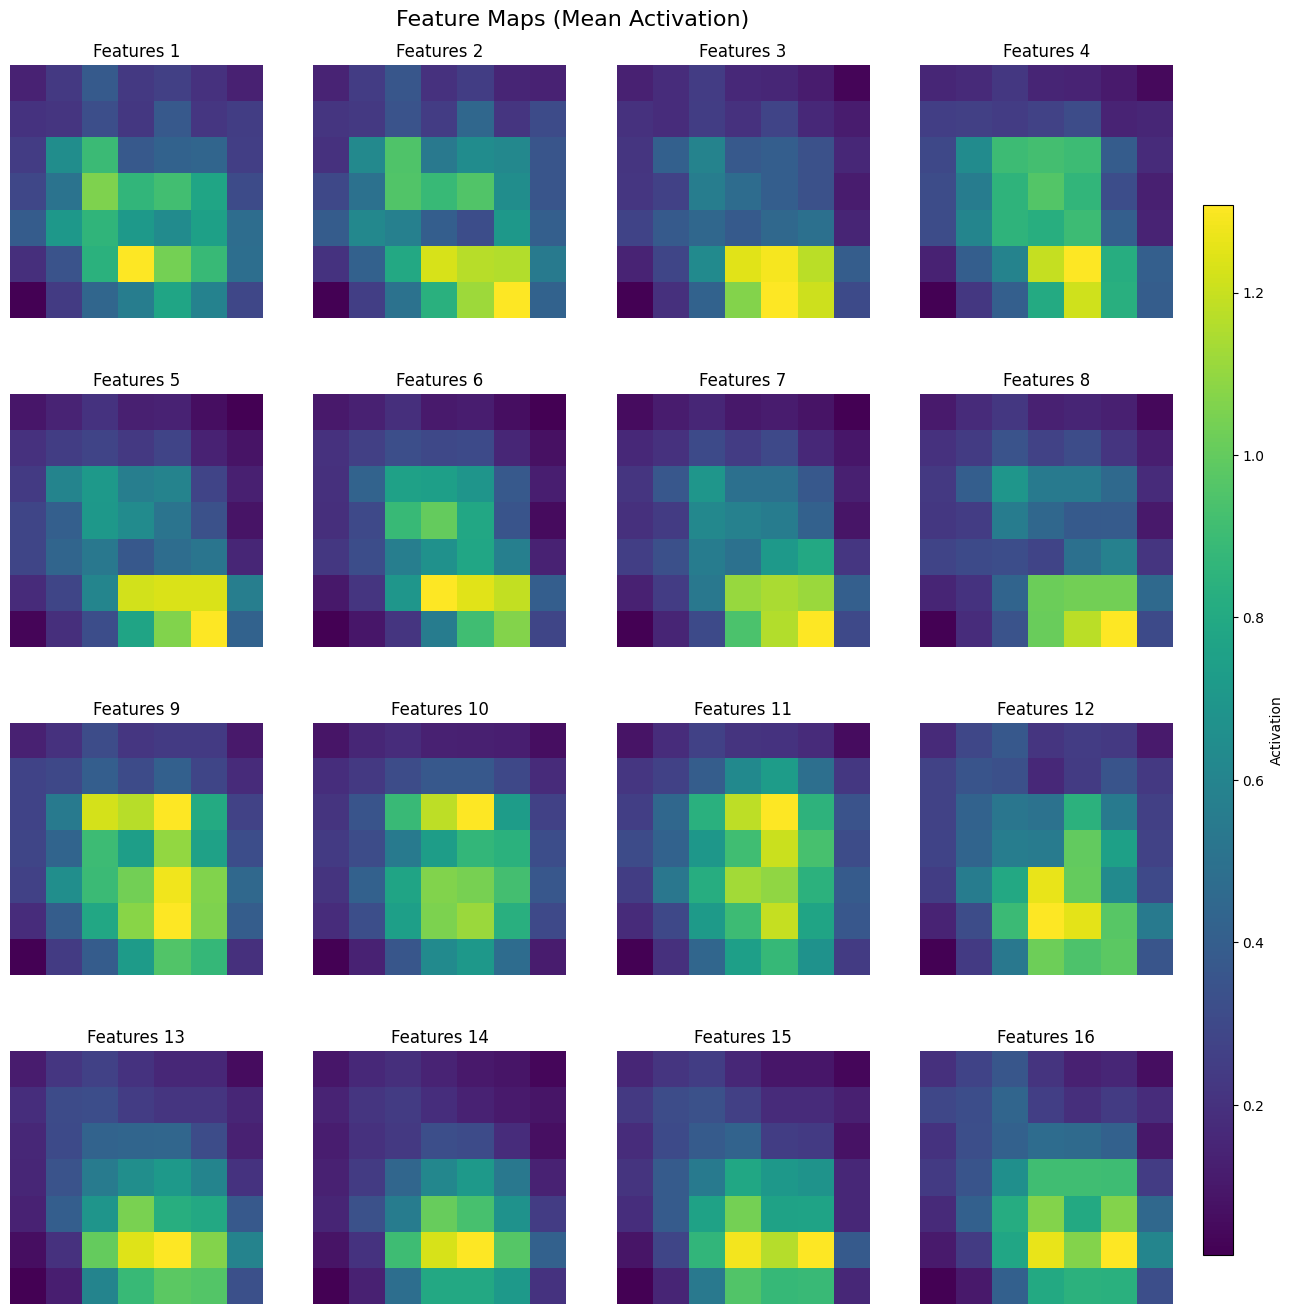

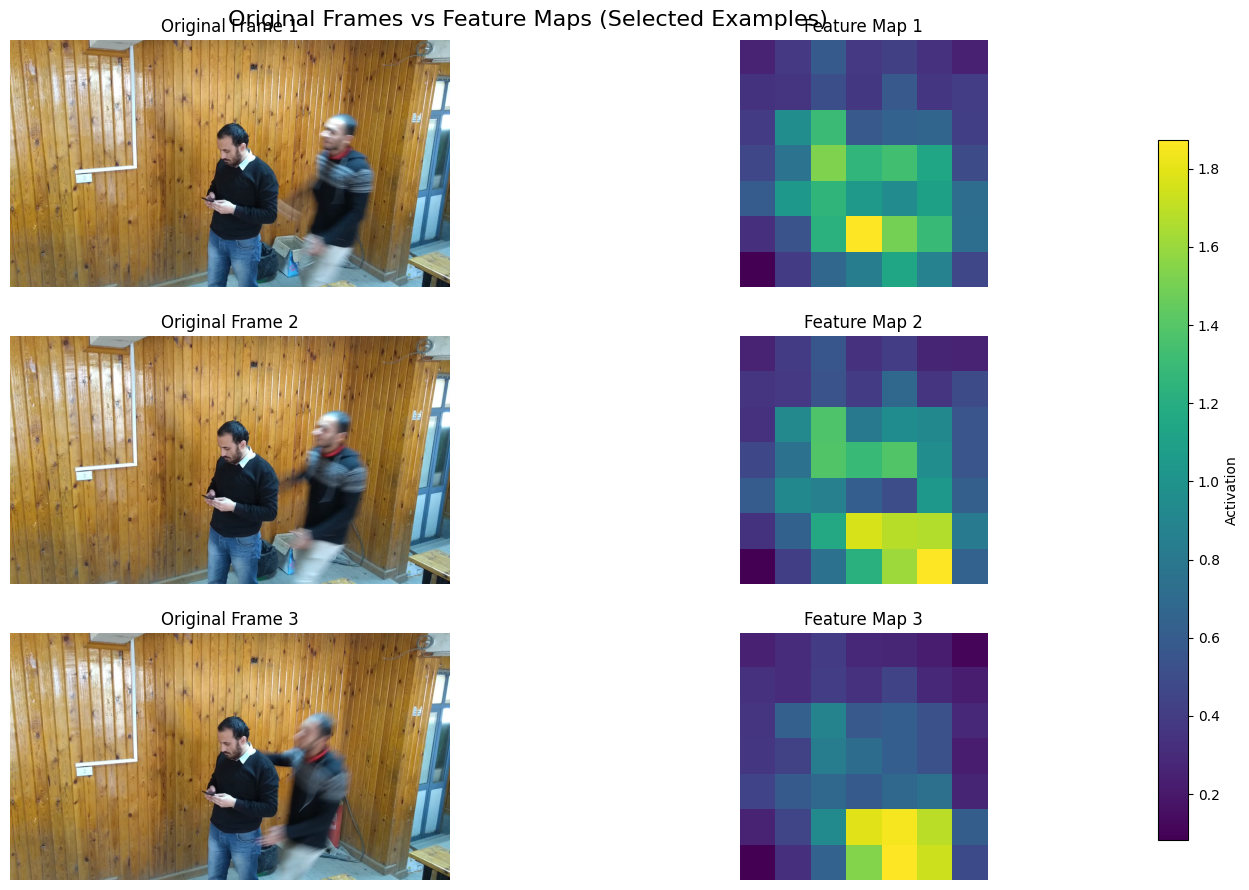

Feature extraction completed!
Feature shape per frame: (1, 7, 7, 1280)
Total features shape: (16, 62720)


In [ ]:
def simulate_feature_extraction_grid(frames, display_features=True):
    """
    Simulate feature extraction using MobileNetV2 and display all frames in a grid.
    
    Parameters:
    - frames: List of frames
    - display_features: Whether to display feature visualization (default: True)
    """
    from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
    from tensorflow.keras.models import Model
    
    print("Loading MobileNetV2 model...")
    # Load base model without classification layer
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    print("Model loaded successfully!")
    
    # Create feature extractor model
    feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)
    
    # Process frames
    processed_frames = []
    for i, frame in enumerate(frames):
        # Resize frame to match model input
        resized_frame = cv2.resize(frame, (224, 224))
        
        # Expand dimensions and preprocess
        input_frame = np.expand_dims(resized_frame, axis=0)
        input_frame = preprocess_input(input_frame)
        
        processed_frames.append(input_frame)
    
    # Extract features
    features = []
    feature_heatmaps = []
    
    for i, frame in enumerate(processed_frames):
        print(f"Extracting features from frame {i+1}/{len(processed_frames)}...")
        feature = feature_extractor.predict(frame, verbose=0)
        features.append(feature)
        
        # Get feature map for visualization
        feature_map = feature[0]
        # Take the mean across the channel dimension to create a 2D heatmap
        feature_heatmap = np.mean(feature_map, axis=2)
        feature_heatmaps.append(feature_heatmap)
    
    if display_features:
        # Calculate grid dimensions based on number of frames
        rows = 4  # Fixed rows for 16 frames (4x4 grid)
        cols = 4  # Fixed columns for 16 frames
        
        # First display original frames grid
        fig = plt.figure(figsize=(15, 15))
        plt.suptitle("Original Frames", fontsize=16)
        
        for i in range(len(frames)):
            plt.subplot(rows, cols, i+1)
            plt.imshow(frames[i])
            plt.title(f"Frame {i+1}")
            plt.axis('off')
        
        # Adjust subplot parameters first
        plt.subplots_adjust(top=0.95)
        display(plt.gcf())
        plt.close()
        
        # Then display feature maps grid
        fig = plt.figure(figsize=(15, 15))
        plt.suptitle("Feature Maps (Mean Activation)", fontsize=16)
        
        for i in range(len(feature_heatmaps)):
            plt.subplot(rows, cols, i+1)
            im = plt.imshow(feature_heatmaps[i], cmap='viridis')
            plt.title(f"Features {i+1}")
            plt.axis('off')
        
        # First adjust the subplot layout, then add colorbar
        plt.subplots_adjust(right=0.9, top=0.95)
        
        # Add a colorbar to the entire figure
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
        plt.colorbar(im, cax=cbar_ax, label='Activation')
        
        display(plt.gcf())
        plt.close()
        
        # Show a side-by-side comparison of a few selected frames
        fig = plt.figure(figsize=(15, 10))
        plt.suptitle("Original Frames vs Feature Maps (Selected Examples)", fontsize=16)
        
        # Show just 3 examples for clarity
        for i in range(min(3, len(frames))):
            # Plot original frame
            plt.subplot(3, 2, i*2+1)
            plt.imshow(frames[i])
            plt.title(f"Original Frame {i+1}")
            plt.axis('off')
            
            # Plot feature map
            plt.subplot(3, 2, i*2+2)
            im = plt.imshow(feature_heatmaps[i], cmap='viridis')
            plt.title(f"Feature Map {i+1}")
            plt.axis('off')
        
        # First adjust the subplot layout, then add colorbar
        plt.subplots_adjust(right=0.9, top=0.95)
        
        # Add colorbar
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
        plt.colorbar(im, cax=cbar_ax, label='Activation')
        
        display(plt.gcf())
        plt.close()
    
    # Convert to numpy array
    features_array = np.vstack([f.reshape(1, -1) for f in features])
    
    print(f"Feature extraction completed!")
    print(f"Feature shape per frame: {features[0].shape}")
    print(f"Total features shape: {features_array.shape}")
    
    return features_array

# Call the function with your frames
features_array = simulate_feature_extraction_grid(frames)


FEATURE EXTRACTION COMPLETE

Preparing to save extracted data:
- features_Own.npy: One video sequence with 16 frames
  Shape: (16, 62720)
- labels_Own.npy: Classification Violent
  Shape: (1, 2)
- video_file_paths_Own.npy: 1 entry
  Path: /Users/ajinkya/Documents/6th_Sem/CV/CP/Violence-Detection/Our_Dataset/Real Life Violence Dataset/Violence/V_1.mp4


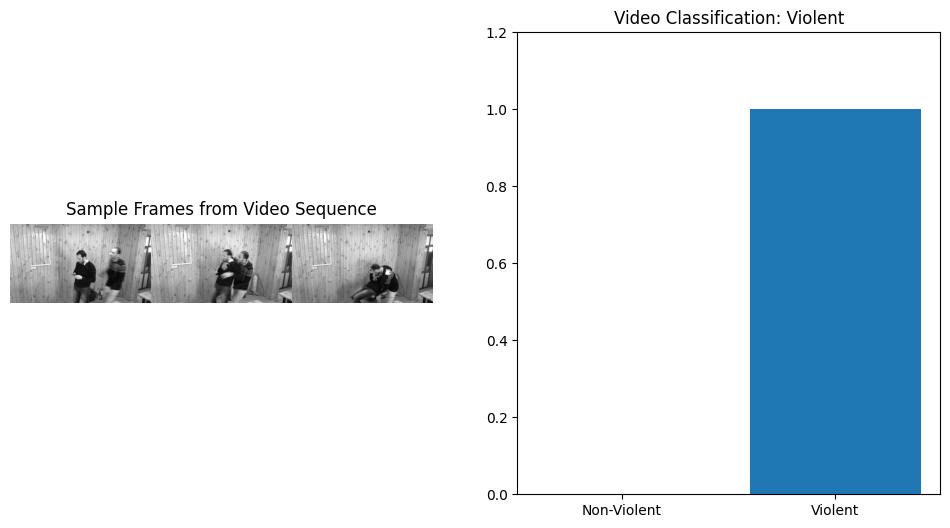

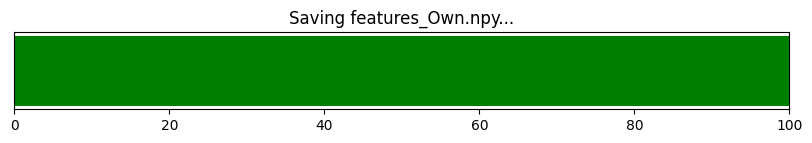

Successfully saved features_Own.npy


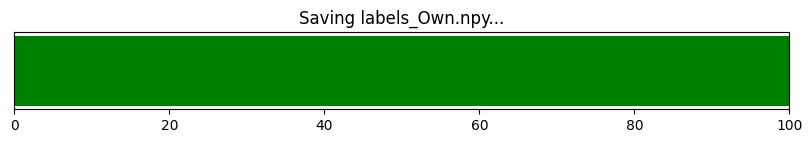

Successfully saved labels_Own.npy


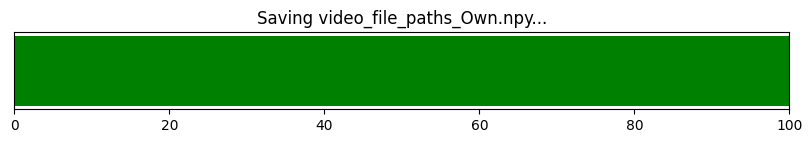

Successfully saved video_file_paths_Own.npy

All data saved successfully! These files will be used for model training.


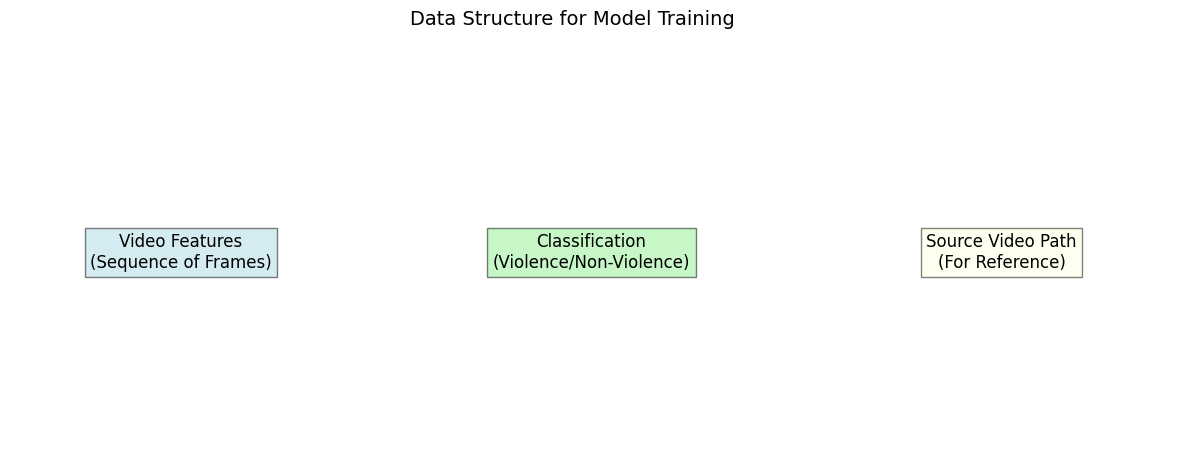


SIMULATION COMPLETE


In [ ]:
def simulate_saving_features(features_array, frames, video_path, is_violent=True):
    """
    Simulate saving extracted features to files.
    
    Parameters:
    - features_array: Extracted features
    - frames: List of frames (for demonstration)
    - video_path: Path to the original video
    - is_violent: Whether the video is classified as violent (default: True)
    """
    # Create proper labels (0: non-violent, 1: violent)
    # Instead of labeling frames, we label the entire video sequence
    label = 1 if is_violent else 0
    
    # Create one-hot encoded label
    one_hot_label = np.zeros(2)
    one_hot_label[label] = 1
    
    # Reshape for demonstration purposes
    labels = one_hot_label.reshape(1, 2)  # Shape: (1, 2)
    
    # Create file paths array - just one entry for the whole video
    video_file_paths = np.array([video_path])
    
    # Display information about the feature extraction
    print("\n" + "="*50)
    print("FEATURE EXTRACTION COMPLETE")
    print("="*50)
    
    # Display information about data to be saved
    print("\nPreparing to save extracted data:")
    print(f"- features_Own.npy: One video sequence with {len(frames)} frames")
    print(f"  Shape: {features_array.shape}")
    print(f"- labels_Own.npy: Classification {['Non-Violent', 'Violent'][label]}")
    print(f"  Shape: {labels.shape}")
    print(f"- video_file_paths_Own.npy: 1 entry")
    print(f"  Path: {video_path}")
    
    # Create visual representation of the sequence and its label
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    
    # Show frames as a sequence
    plt.imshow(np.hstack([frames[0][:,:,0], frames[len(frames)//2][:,:,0], frames[-1][:,:,0]]), cmap='gray')
    plt.title("Sample Frames from Video Sequence")
    plt.axis('off')
    
    # Show the classification
    plt.subplot(1, 2, 2)
    plt.bar(['Non-Violent', 'Violent'], one_hot_label)
    plt.title(f"Video Classification: {['Non-Violent', 'Violent'][label]}")
    plt.ylim(0, 1.2)
    
    display(plt.gcf())
    plt.close()
    
    # Simulate the saving process with progress visualizations
    for i, file_name in enumerate(["features_Own.npy", "labels_Own.npy", "video_file_paths_Own.npy"]):
        # Create a progress bar simulation
        plt.figure(figsize=(10, 1))
        plt.barh(0, 100, color='green')
        plt.xlim(0, 100)
        plt.yticks([])
        plt.title(f"Saving {file_name}...")
        display(plt.gcf())
        plt.close()
        
        # Simulate saving time
        time.sleep(1)
        print(f"Successfully saved {file_name}")
    
    print("\nAll data saved successfully! These files will be used for model training.")
    
    # Show a summary of the saved data structure
    plt.figure(figsize=(15, 5))
    
    # Diagram showing data organization
    plt.subplot(1, 3, 1)
    plt.text(0.5, 0.5, "Video Features\n(Sequence of Frames)", 
             ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.text(0.5, 0.5, "Classification\n(Violence/Non-Violence)", 
             ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.text(0.5, 0.5, "Source Video Path\n(For Reference)", 
             ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightyellow', alpha=0.5))
    plt.axis('off')
    
    plt.suptitle("Data Structure for Model Training", fontsize=14)
    display(plt.gcf())
    plt.close()
    
    print("\n" + "="*50)
    print("SIMULATION COMPLETE")
    print("="*50)
    
    return features_array, labels, video_file_paths

# Example usage:
features, labels, paths = simulate_saving_features(
    features_array, 
    frames, 
    "/Users/ajinkya/Documents/6th_Sem/CV/CP/Violence-Detection/Our_Dataset/Real Life Violence Dataset/Violence/V_1.mp4", 
    is_violent=True
)

# Uncomment these lines if you want to actually save the files:
# np.save("features_Own.npy", features_array)
# np.save("labels_Own.npy", labels)
# np.save("video_file_paths_Own.npy", video_file_paths)